In [7]:
#import libraries to work with
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
%matplotlib notebook

#make a dataframe object and load a dataset about cereals into it
df = pd.read_csv('cereal.csv')

# change the names in the mfg column to the full manufacturer names
df = df.replace({'A' : 'American Home Food Products',
            'G' : 'General Mills',
            'K' : 'Kelloggs',
            'N' : 'Nabisco',
            'P' : 'Post',
            'Q' : 'Quaker Oats',
            'R' : 'Ralston Purina'})


df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,Nabisco,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Quaker Oats,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,Kelloggs,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,Kelloggs,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,Ralston Purina,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [8]:
df.shape

(77, 16)

So it looks like this data set has 77 rows for different types of cereal, with 16 different columns for name, brand, and nutrition facts

In [20]:
#exploratory data analysis to see which manufacturers are the big players
#in the cereal market

#histogram of manufacturers
#convert the 'mfr' column to a list using to_list() method
 
print(df['mfr'].value_counts())


Kelloggs                       23
General Mills                  22
Post                            9
Ralston Purina                  8
Quaker Oats                     8
Nabisco                         6
American Home Food Products     1
Name: mfr, dtype: int64


<IPython.core.display.Javascript object>


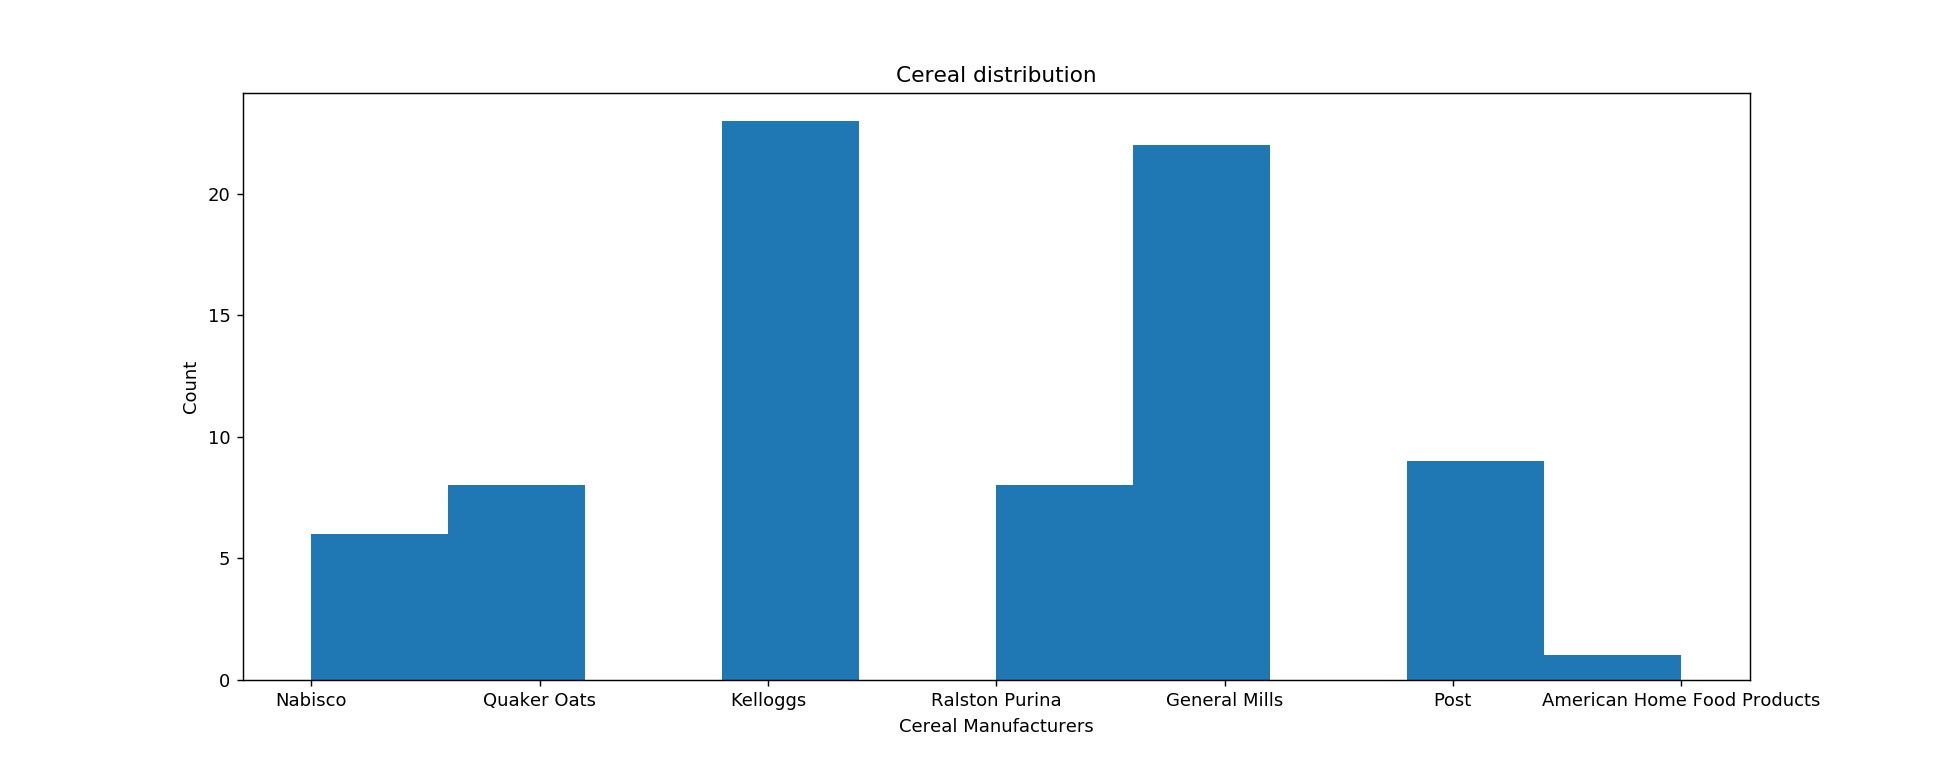

In [26]:
plt.figure(figsize=(15, 6))
plt.hist(df['mfr'].tolist())
plt.title('Cereal distribution')
plt.xlabel('Cereal Manufacturers')
plt.ylabel('Count')
plt.show()

mfr: Manufacturer of cereal

A = American Home Food Products

G = General Mills

K = Kelloggs

N = Nabisco

P = Post

Q = Quaker Oats

R = Ralston Purina


It looks like Kelloggs and General Mills are the big players, dominating the market with 23 and 22 different types of cereals in the market

<IPython.core.display.Javascript object>


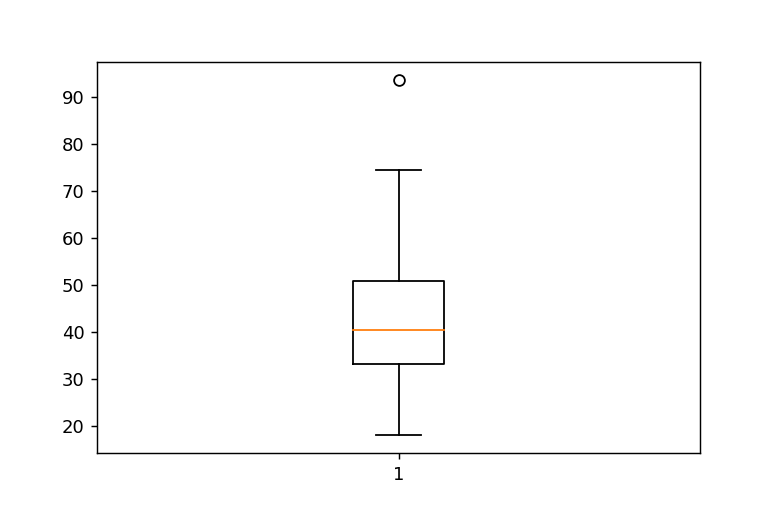

The mean rating is 42.66570498701299
The IQR is 17.654297999999997


In [23]:
#looking at the ratings of different cereals
#plotting a boxplot of the ratings

plt.boxplot(df['rating'].tolist())
plt.show()

#interquartile range calculation:
q75, q25 = np.percentile(df['rating'].tolist(), [75, 25])
iqr = q75 - q25
print('The mean rating is {}'.format(df['rating'].mean()))
print('The IQR is {}'.format(iqr))

Looking at a boxplot of the ratings of the different cereals, it looks like the median rating is around 43/100, with an interquartile range of 17.65, indicating that a lot of the ratings are fairly low and centered around the median. Most of the cereals are not rated that highly.

# Looking at different variables influencing the rating of a cereal


<IPython.core.display.Javascript object>


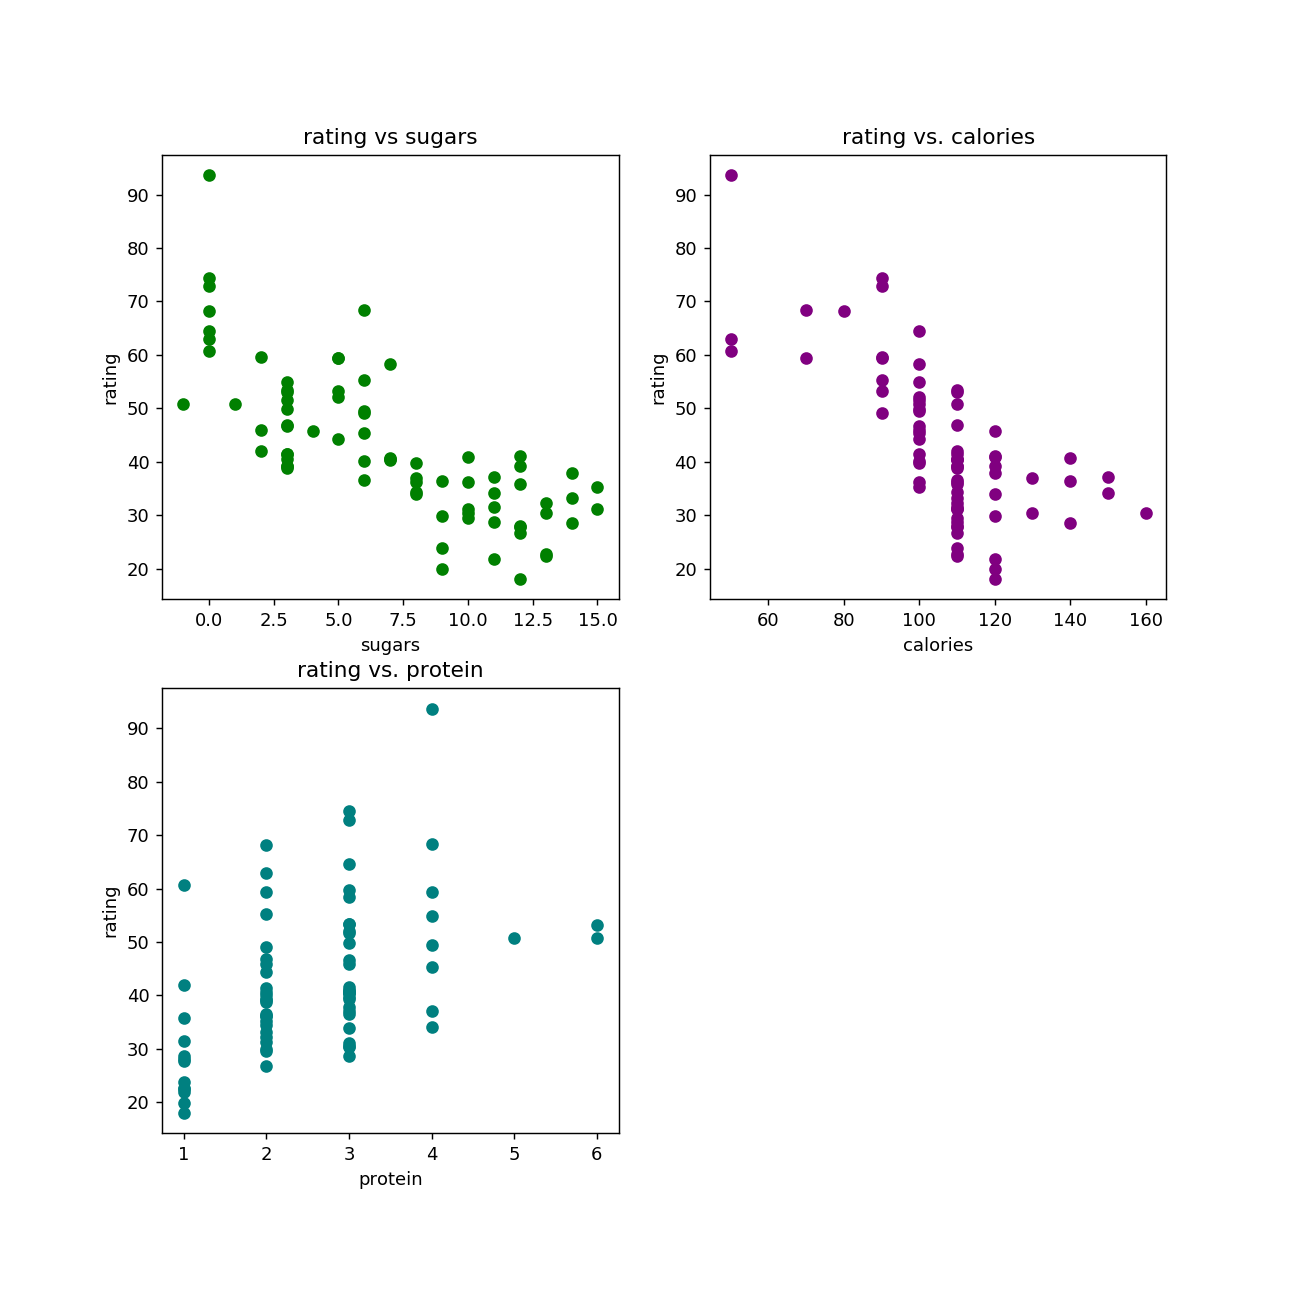

Text(0.5, 1.0, 'rating vs. protein')

In [15]:
#making a subplot of scatterplots analyzing the variables that could
#affect the rating of a cereal

plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.scatter(x=df['sugars'].tolist(), 
            y=df['rating'].tolist(), 
            color='green')
plt.xlabel('sugars')
plt.ylabel('rating')
plt.title('rating vs sugars')
    

plt.subplot(2, 2, 2)
plt.scatter(x=df['calories'].tolist(), 
            y=df['rating'].tolist(),
           color='purple')
plt.xlabel('calories')
plt.ylabel('rating')
plt.title('rating vs. calories')

plt.subplot(2, 2, 3)
plt.scatter(x=df['protein'].tolist(),
            y=df['rating'].tolist(),
            color='teal')

plt.xlabel('protein')
plt.ylabel('rating')
plt.title('rating vs. protein')



Looking at the scatter plots, it can be seen there is a strong negative correlation between ratings and sugars as well as rating and calories of cereals. People must be averse to more nutritionally unhealthy cereals, and may have more of an affinity towards nutritionally healthier cereals, indicated by the postive correlation between rating and protein.

# Which cereal manufacturer makes the best cereal? 


In [17]:
# we want to look at the ratings of the cereals, organized by manufacturer
# grouping the data frame to have a column of manufacturers and a column of the average rating of a cereal made 
# by that manufacturer

mfr_grouped = df.groupby('mfr').aggregate(np.mean)


    


,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
mfr,,,,,,,,,,,,,
American Home Food Products,100.000000,4.000000,1.000000,0.000000,0.000000,16.000000,3.000000,95.000000,25.000000,2.000000,1.000000,1.000000,54.850917
General Mills,111.363636,2.318182,1.363636,200.454545,1.272727,14.727273,7.954545,85.227273,35.227273,2.136364,1.049091,0.875000,34.485852
Kelloggs,108.695652,2.652174,0.608696,174.782609,2.739130,15.130435,7.565217,103.043478,34.782609,2.347826,1.077826,0.796087,44.038462
Nabisco,86.666667,2.833333,0.166667,37.500000,4.000000,16.000000,1.833333,120.666667,8.333333,1.666667,0.971667,0.778333,67.968567
Post,108.888889,2.444444,0.888889,146.111111,2.777778,13.222222,8.777778,113.888889,25.000000,2.444444,1.064444,0.714444,41.705744
Quaker Oats,95.000000,2.625000,1.750000,92.500000,1.337500,10.000000,5.250000,74.375000,12.500000,2.375000,0.875000,0.823750,42.915990
Ralston Purina,115.000000,2.500000,1.250000,198.125000,1.875000,17.625000,6.125000,89.250000,25.000000,2.000000,1.000000,0.871250,41.542997


In [35]:
# plotting ratings 

mfr_grouped.describe()


,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,103.659263,2.767591,1.003984,121.353324,2.000305,14.672133,5.786553,97.350187,23.691888,2.138614,1.005433,0.836981,46.786933
std,10.147292,0.567862,0.519139,79.800849,1.299661,2.462723,2.601491,16.307264,10.184516,0.275181,0.069331,0.090827,11.112018
min,86.666667,2.318182,0.166667,0.000000,0.000000,10.000000,1.833333,74.375000,8.333333,1.666667,0.875000,0.714444,34.485852
25%,97.500000,2.472222,0.748792,65.000000,1.305114,13.974747,4.125000,87.238636,18.750000,2.000000,0.985833,0.787210,41.624371
50%,108.695652,2.625000,1.000000,146.111111,1.875000,15.130435,6.125000,95.000000,25.000000,2.136364,1.000000,0.823750,42.915990
75%,110.126263,2.742754,1.306818,186.453804,2.758454,16.000000,7.759881,108.466184,29.891304,2.361413,1.056768,0.873125,49.444690
max,115.000000,4.000000,1.750000,200.454545,4.000000,17.625000,8.777778,120.666667,35.227273,2.444444,1.077826,1.000000,67.968567


In [10]:
df2 = df.groupby('calories')

In [11]:
df2